# ---------------------  TASK2  ------------------------

### Question 1(i)

In [7]:
import pandas as pd 
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 
%config InlineBackend.figure_format='retina'
from MakeDataset import X_train,X_test,y_train,y_test

X_train_total_acc = np.sum(X_train**2, axis=2)
X_test_total_acc = np.sum(X_test**2, axis=2)
# print(X_train)
# print(X_train_total_acc)
print("Shape of x_train is ", X_train.shape)
print("Shape of x_train_total_acc is ", X_train_total_acc.shape)
model1 = DecisionTreeClassifier()
model1.fit(X_train_total_acc, y_train)

y_pred = model1.predict(X_test_total_acc)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision : {precision:.2f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall : {recall:.2f}")

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix")
print(cm)



Shape of x_train is  (126, 500, 3)
Shape of x_train_total_acc is  (126, 500)
Accuracy: 0.57
Precision : 0.57
Recall : 0.57
Confusion Matrix
[[4 0 3 0 2 0]
 [2 3 2 0 1 1]
 [3 2 4 0 0 0]
 [0 0 0 5 0 4]
 [0 0 0 0 9 0]
 [0 0 0 3 0 6]]


### Question 1(ii)

In [8]:
import tsfel 
from MakeDataset import X_train, y_train, X_test, y_test 

print("Shape of X_train is ", X_train.shape)

cfg = tsfel.get_features_by_domain()

x_train_tsfel = tsfel.time_series_features_extractor(cfg, X_train)
x_test_tsfel = tsfel.time_series_features_extractor(cfg, X_test)

print("Shape of X_train_tsfel is ",  x_train_tsfel.shape)
# print(x_train_tsfel)

model2 = DecisionTreeClassifier()
model2.fit(x_train_tsfel, y_train)

y_pred = model2.predict(x_test_tsfel)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision : {precision:.2f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall : {recall:.2f}")

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix")
print(cm)


Shape of X_train is  (126, 500, 3)
*** Feature extraction started ***


C:\Users\shivanshgupta\AppData\Local\Temp\ipykernel_17688\4027718442.py:8: UserWarning: Using default sampling frequency set in configuration file.
  x_train_tsfel = tsfel.time_series_features_extractor(cfg, X_train)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\shivanshgupta\AppData\Local\Temp\ipykernel_17688\4027718442.py:9: UserWarning: Using default sampling frequency set in configuration file.
  x_test_tsfel = tsfel.time_series_features_extractor(cfg, X_test)



*** Feature extraction finished ***
Shape of X_train_tsfel is  (126, 1152)
Accuracy: 0.89
Precision : 0.89
Recall : 0.89
Confusion Matrix
[[6 1 2 0 0 0]
 [1 8 0 0 0 0]
 [0 2 7 0 0 0]
 [0 0 0 9 0 0]
 [0 0 0 0 9 0]
 [0 0 0 0 0 9]]


### Question 1(iii)

In [9]:
x_train = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv("UCI HAR Dataset/train/y_train.txt", header=None)
x_test = pd.read_csv("UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
y_test = pd.read_csv("UCI HAR Dataset/test/y_test.txt", header=None)

model3 = DecisionTreeClassifier()
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision : {precision:.2f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall : {recall:.2f}")

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix")
print(cm)

C:\Users\shivanshgupta\AppData\Local\Temp\ipykernel_17688\2076236467.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  x_train = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
C:\Users\shivanshgupta\AppData\Local\Temp\ipykernel_17688\2076236467.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  x_test = pd.read_csv("UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)


Accuracy: 0.85
Precision : 0.85
Recall : 0.85
Confusion Matrix
[[442  32  22   0   0   0]
 [ 71 359  41   0   0   0]
 [ 21  48 351   0   0   0]
 [  0   0   0 376 115   0]
 [  0   0   0  81 451   0]
 [  0   0   0   0   0 537]]


### Question 1(iv)
###### As we can see that model2 that is trained using features extracted from tsfel has accuracy 89%,precision 89%, recall 89% that is better than other 2 models. Here, we can observe model2 performs well on extracted temporal, statistical, spectral and fractal features using tsfel library. As we can see model1 using raw accelerometer performs worst that highlights the need of feature extraction before training the model. If we compare the model2 and model3 that provided features are also effective but not better than tsfel features.

###### Certainly model2 is the best out of all.

### ------------------- Question 2 ------------------

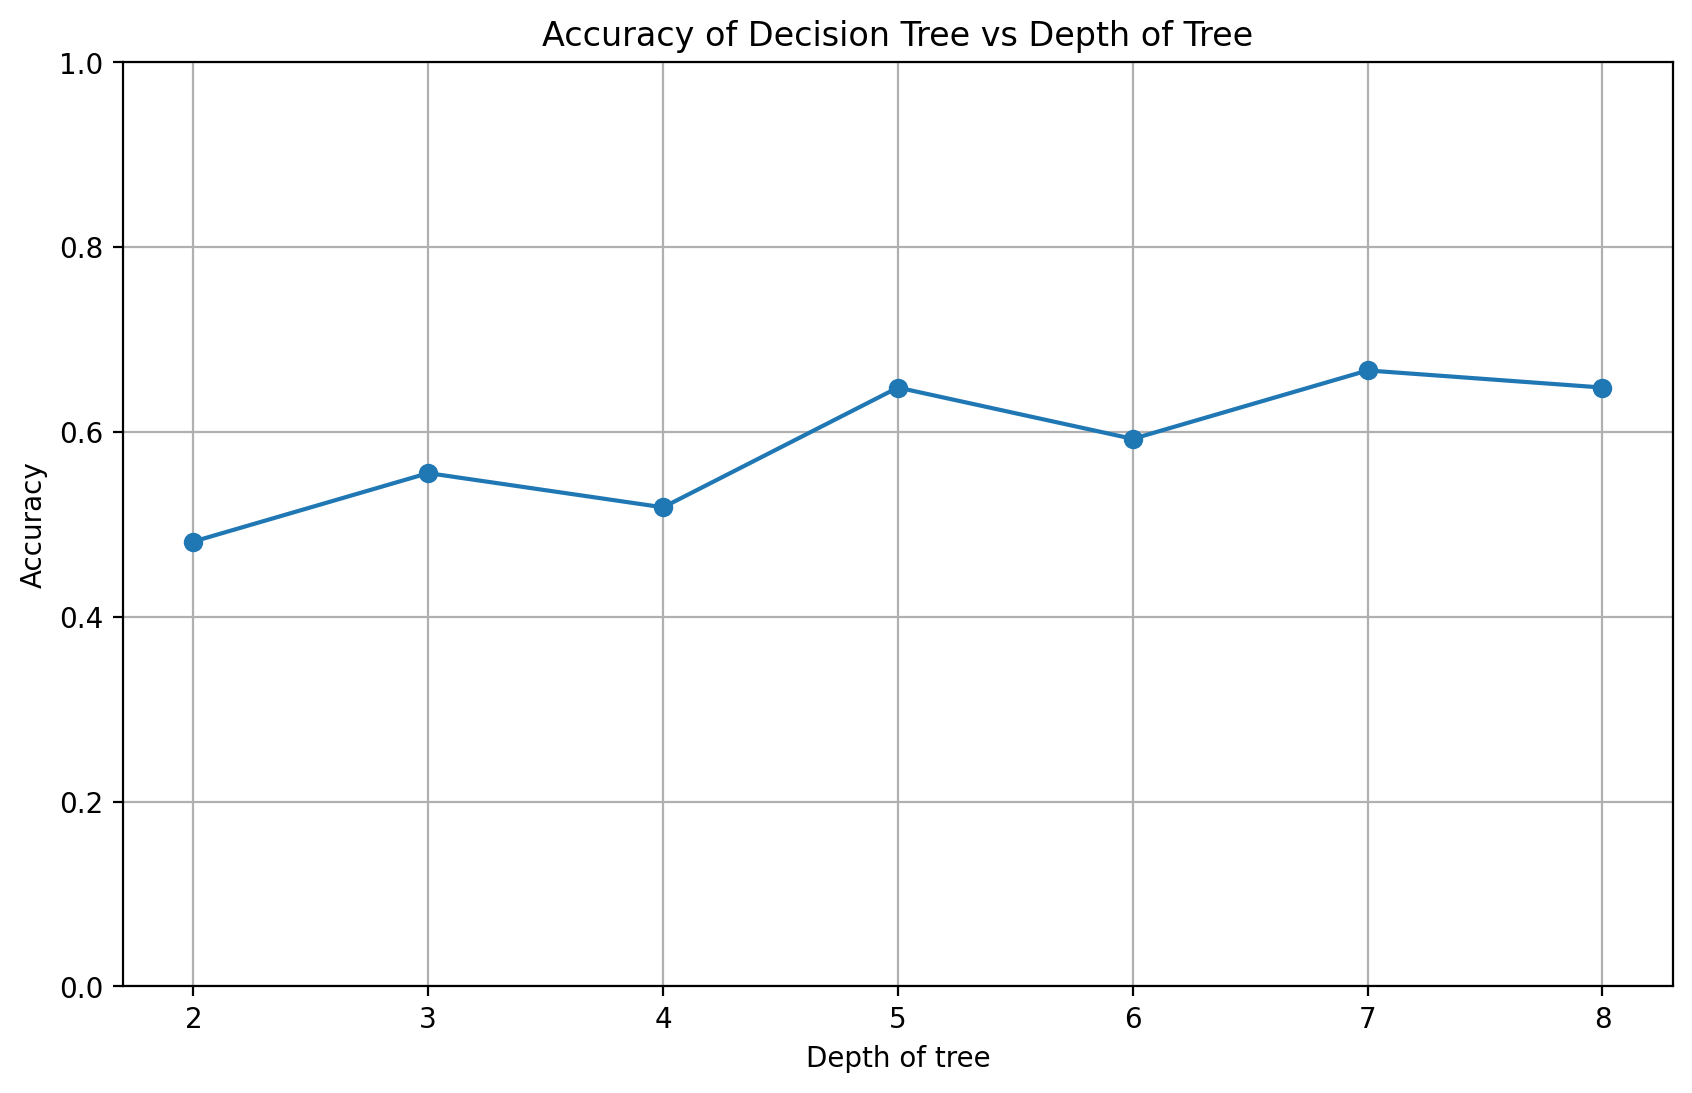

In [10]:
from MakeDataset import X_train, X_test, y_train, y_test

accuracies = []
depths = range(2,9)

X_train_total_acc = np.sum(X_train**2, axis=2)
X_test_total_acc = np.sum(X_test**2, axis=2)


for depth in depths:
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train_total_acc, y_train)
    y_pred = model.predict(X_test_total_acc)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10,6))
plt.plot(depths, accuracies, marker='o')
plt.title('Accuracy of Decision Tree vs Depth of Tree')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.ylim(0,1)
plt.grid()
plt.show()



*** Feature extraction started ***


C:\Users\shivanshgupta\AppData\Local\Temp\ipykernel_17688\2948562502.py:4: UserWarning: Using default sampling frequency set in configuration file.
  x_train_tsfel = tsfel.time_series_features_extractor(cfg, X_train)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\shivanshgupta\AppData\Local\Temp\ipykernel_17688\2948562502.py:5: UserWarning: Using default sampling frequency set in configuration file.
  x_test_tsfel = tsfel.time_series_features_extractor(cfg, X_test)



*** Feature extraction finished ***


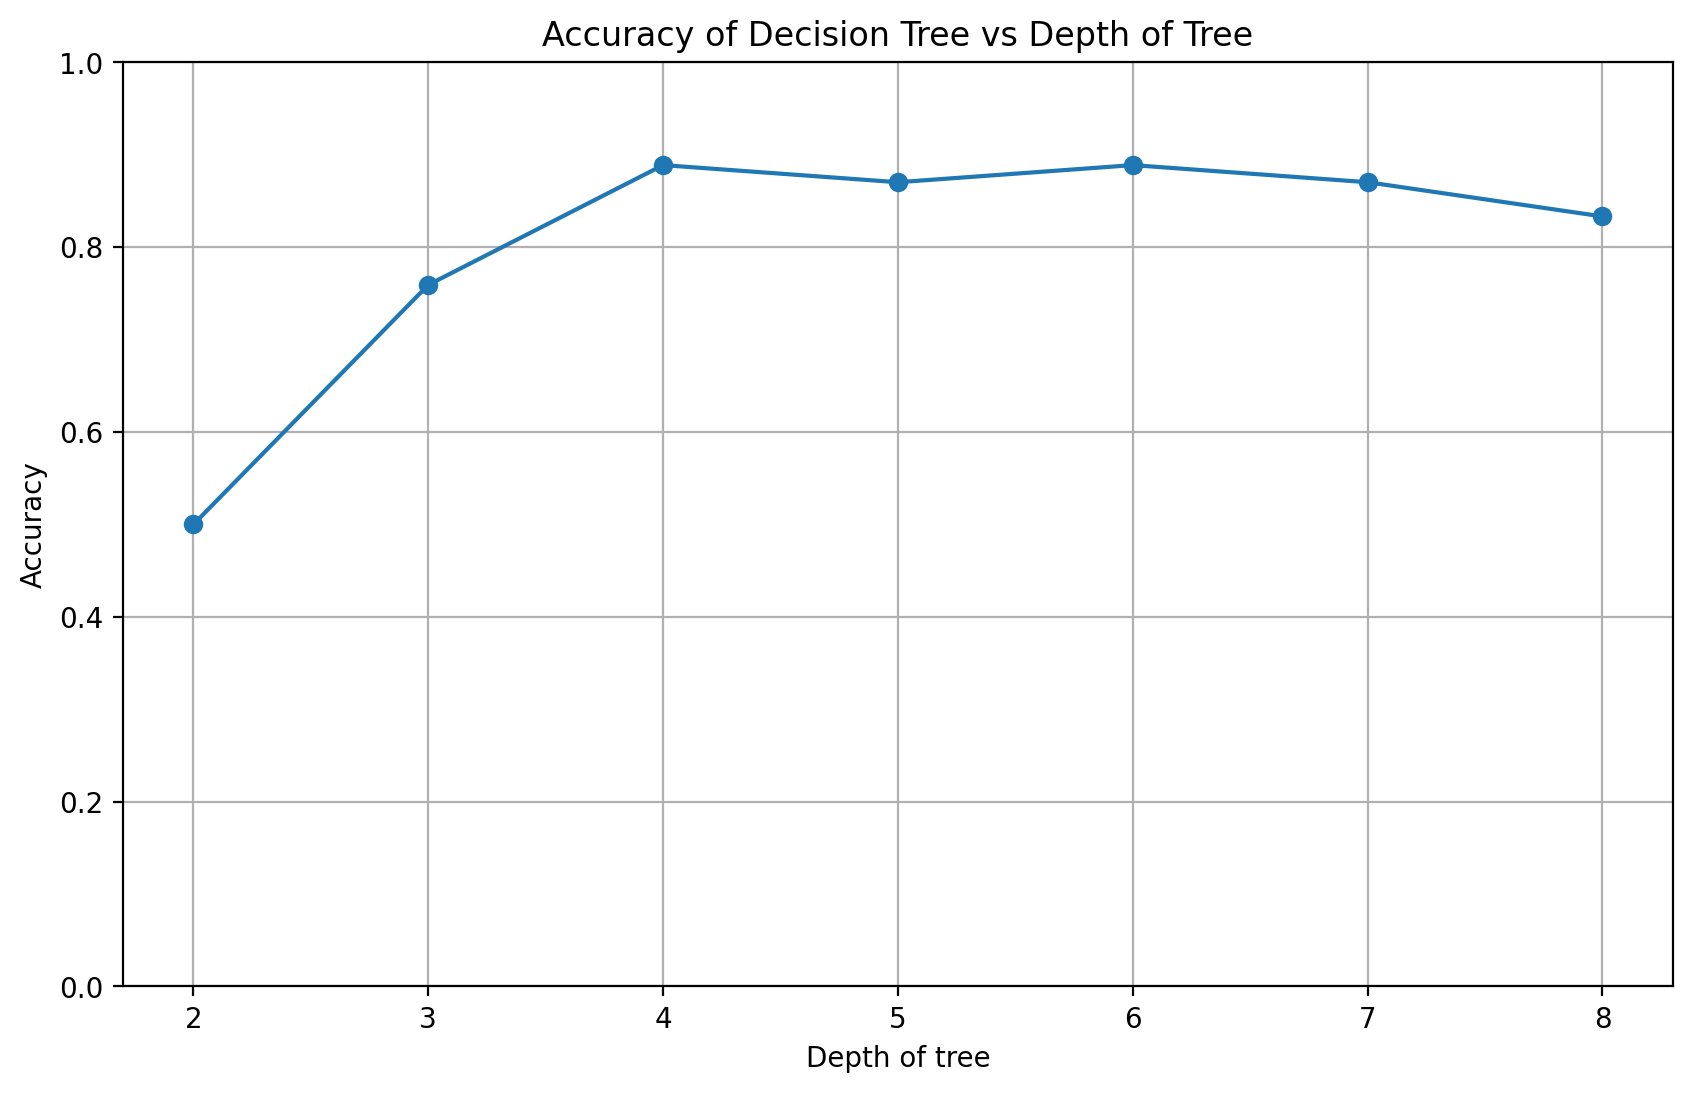

In [11]:
from MakeDataset import X_train,X_test,y_train,y_test

cfg = tsfel.get_features_by_domain()
x_train_tsfel = tsfel.time_series_features_extractor(cfg, X_train)
x_test_tsfel = tsfel.time_series_features_extractor(cfg, X_test)

accuracies = []
depths = range(2,9)

for depth in depths: 
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(x_train_tsfel, y_train)
    y_pred = model.predict(x_test_tsfel)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10,6))
plt.plot(depths, accuracies, marker='o')
plt.title('Accuracy of Decision Tree vs Depth of Tree')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.ylim(0,1)
plt.grid()
plt.show()


C:\Users\shivanshgupta\AppData\Local\Temp\ipykernel_17688\3064827977.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  x_train = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
C:\Users\shivanshgupta\AppData\Local\Temp\ipykernel_17688\3064827977.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  x_test = pd.read_csv("UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)


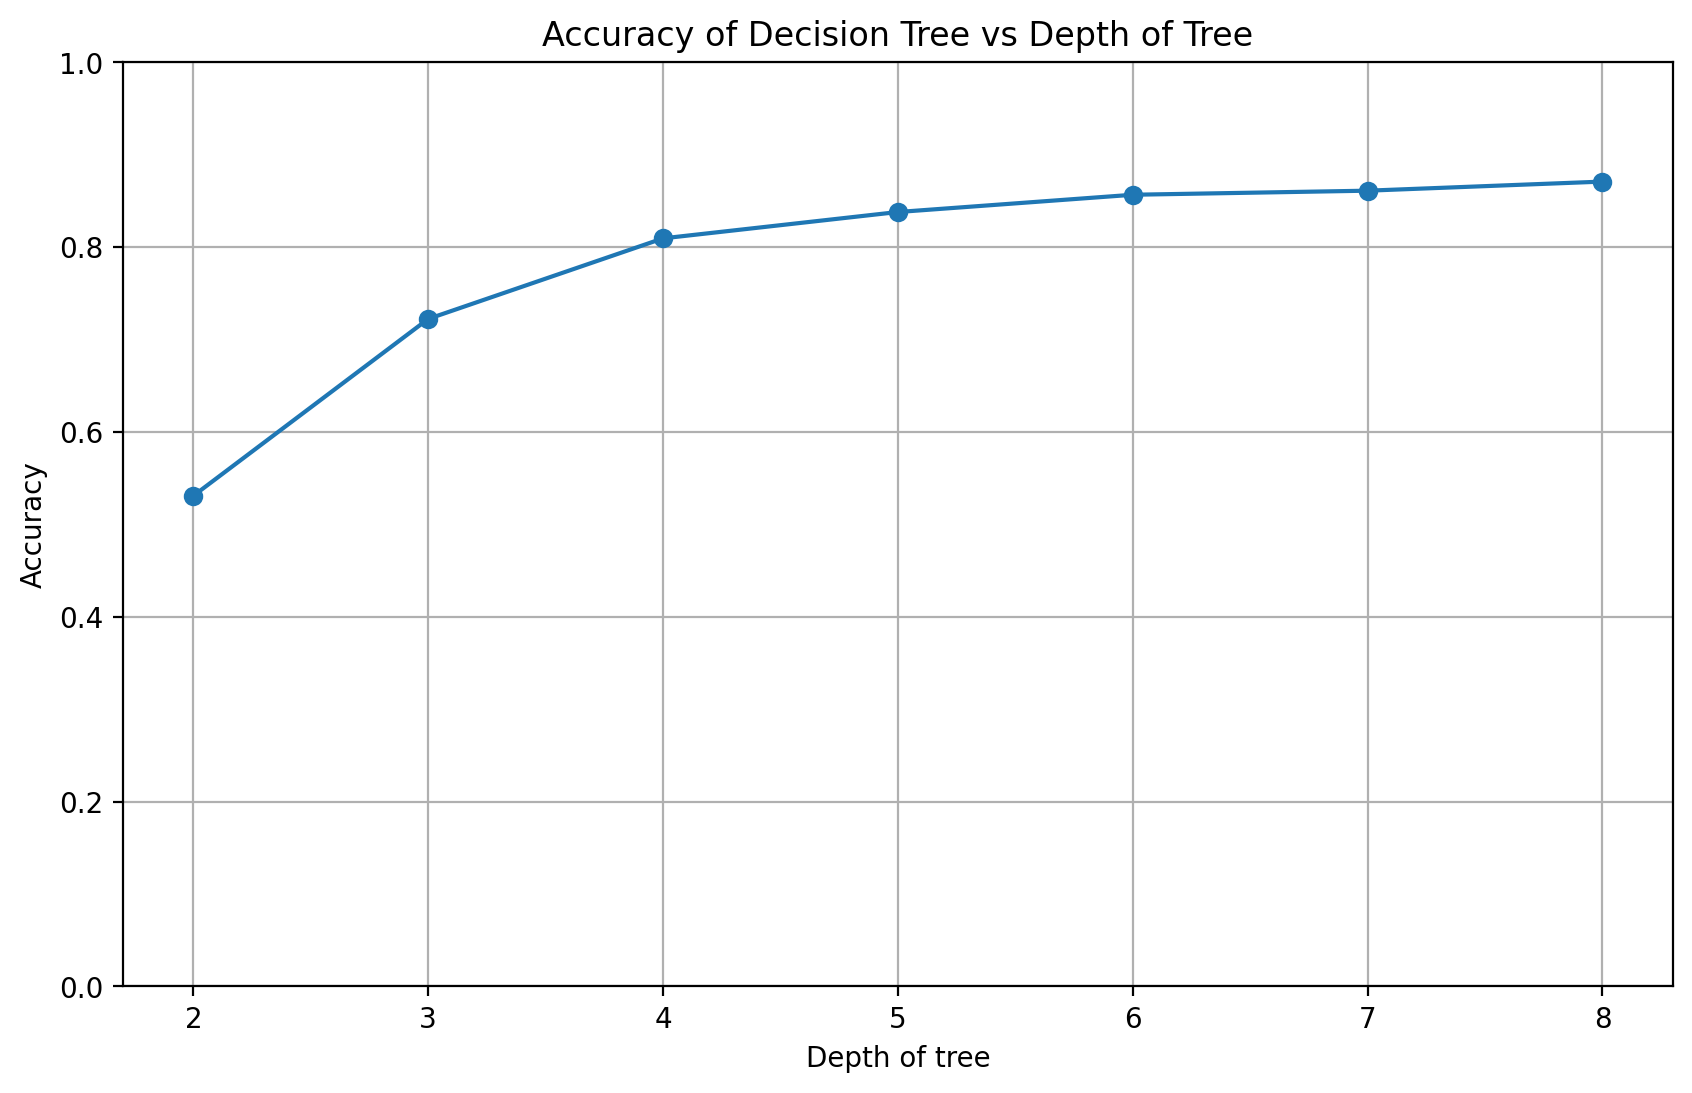

In [12]:

x_train = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv("UCI HAR Dataset/train/y_train.txt", header=None)
x_test = pd.read_csv("UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
y_test = pd.read_csv("UCI HAR Dataset/test/y_test.txt", header=None)

accuracies = []
depths = range(2,9)


for depth in depths:
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10,6))
plt.plot(depths, accuracies, marker='o')
plt.title('Accuracy of Decision Tree vs Depth of Tree')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.ylim(0,1)
plt.grid()
plt.show()

### Question 3
As we can observe from the confustion matrix of these three different models that laying activity is misclassified as sitting or standing.